# Plotting and Visualization

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

Always add this line to your code show your plots so "in-line"

In [2]:
%matplotlib inline

In [3]:
%pwd

u'/Users/mylesgartland/Documents/Courses/Data Mining/Intro to Python/Python notebook items'

## A brief matplotlib API primer

In [4]:
import matplotlib.pyplot as plt

### Figures and Subplots

In [4]:
fig = plt.figure()

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

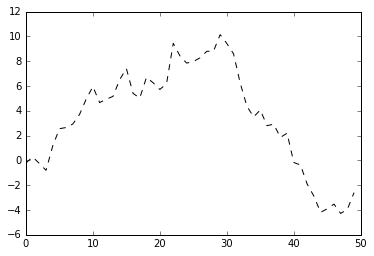

In [7]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

In [9]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [10]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109926a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x109e4a3d0>]], dtype=object)

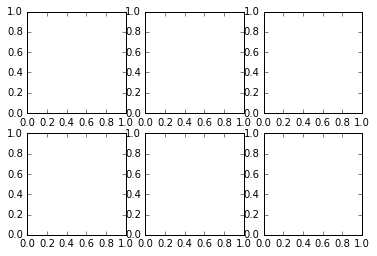

In [11]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

In [12]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

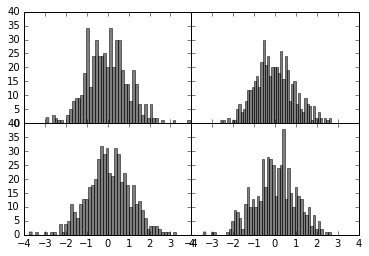

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

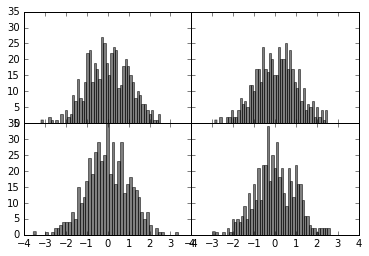

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

In [15]:
plt.figure()

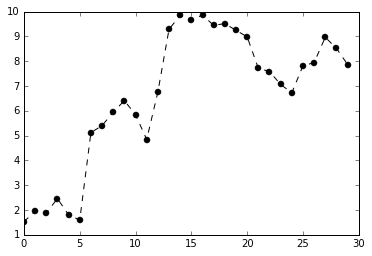

In [16]:
plt.plot(randn(30).cumsum(), 'ko--')

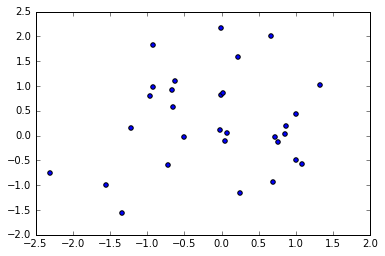

In [8]:
plt.scatter(randn(30),randn(30))

In [17]:
plt.close('all')

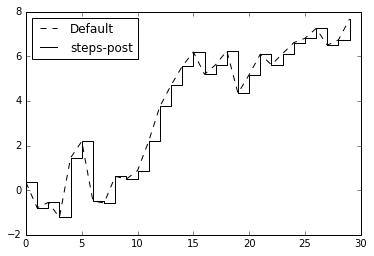

In [18]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

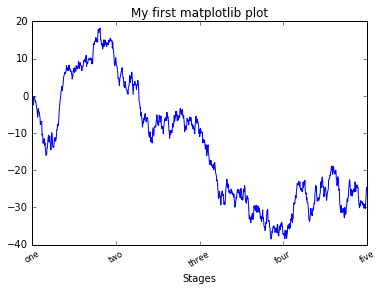

In [19]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

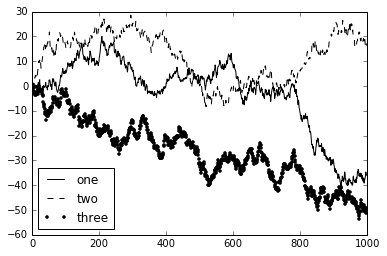

In [20]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Saving plots to file

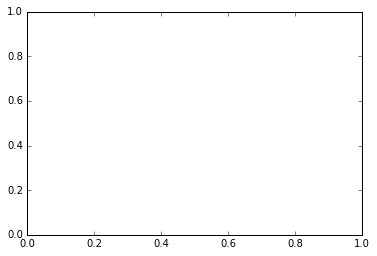

In [22]:
fig

In [23]:
fig.savefig('figpath.svg')

In [24]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [25]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

In [26]:
plt.rc('figure', figsize=(10, 10))

## Plotting functions in pandas

### Line plots

In [27]:
plt.close('all')

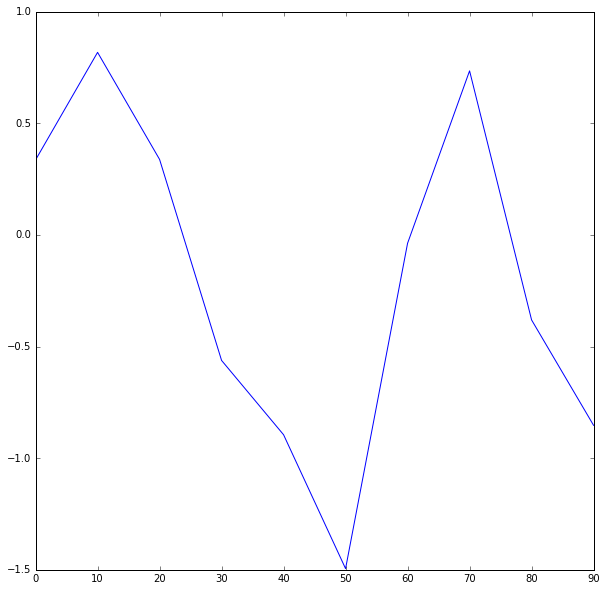

In [28]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

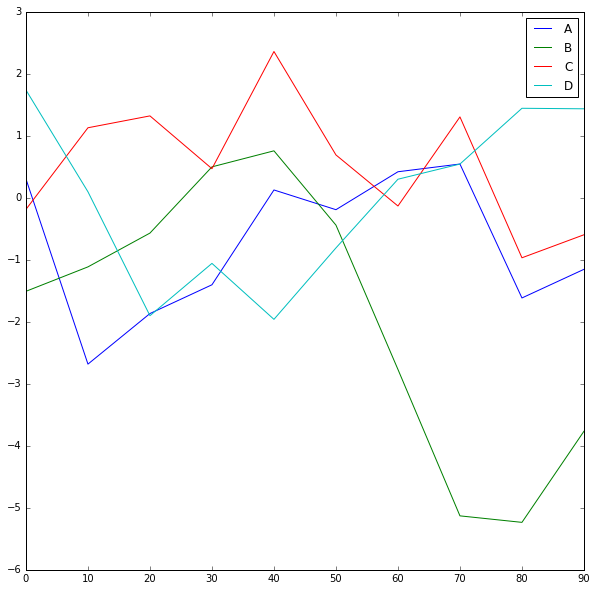

In [29]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### Bar plots

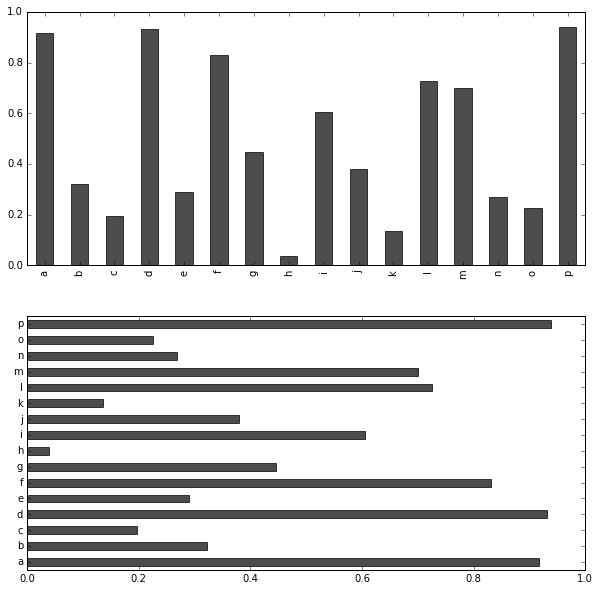

In [30]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

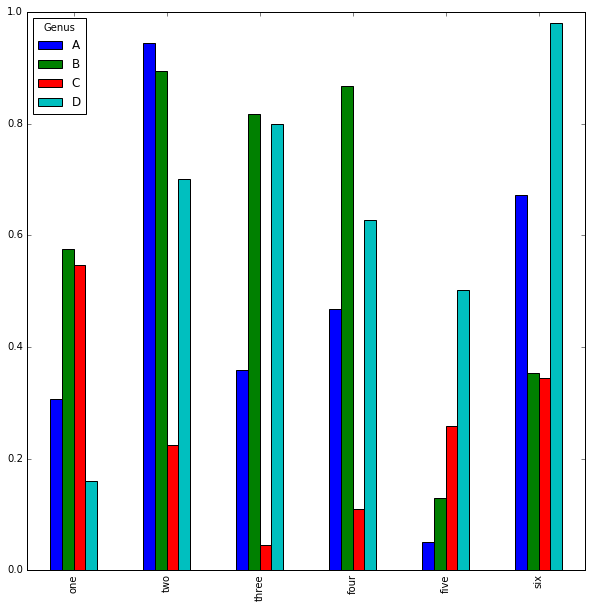

In [31]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [32]:
plt.figure()

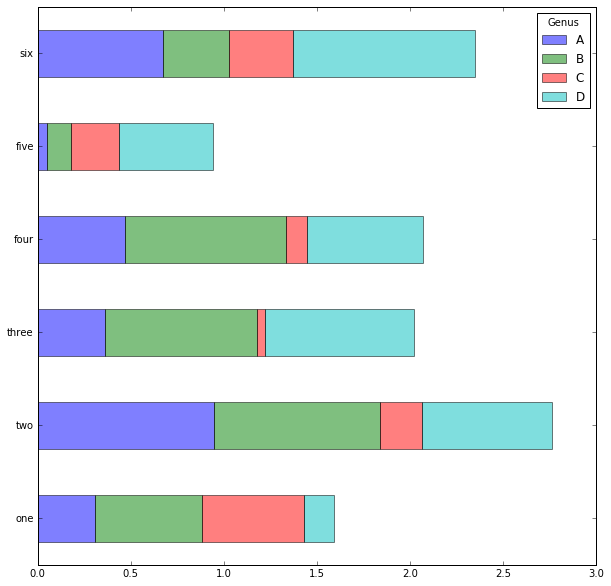

In [35]:
df.plot(kind='barh', stacked=True, alpha=0.5)

### Histograms and density plots

In [38]:
plt.figure()

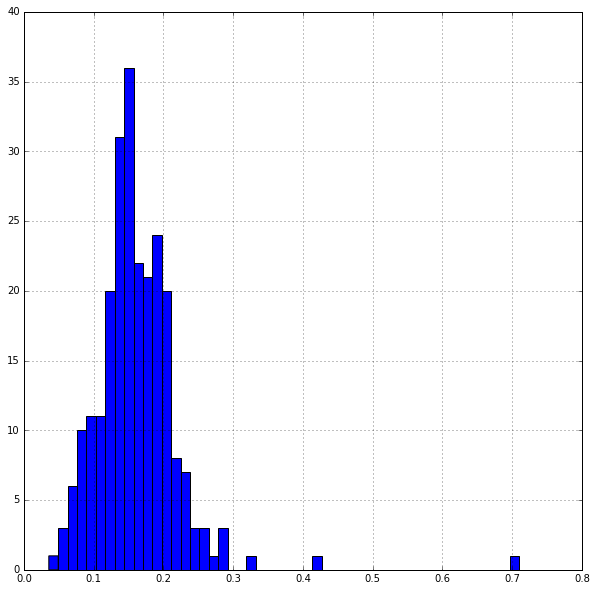

In [39]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [40]:
plt.figure()

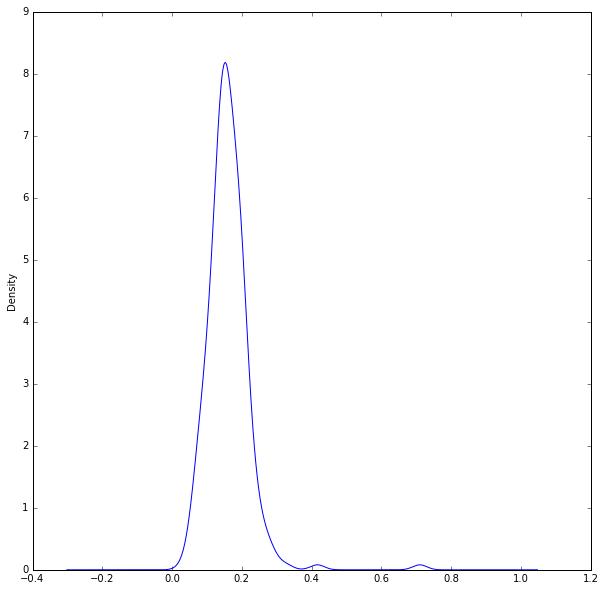

In [41]:
tips['tip_pct'].plot(kind='kde')

In [42]:
plt.figure()

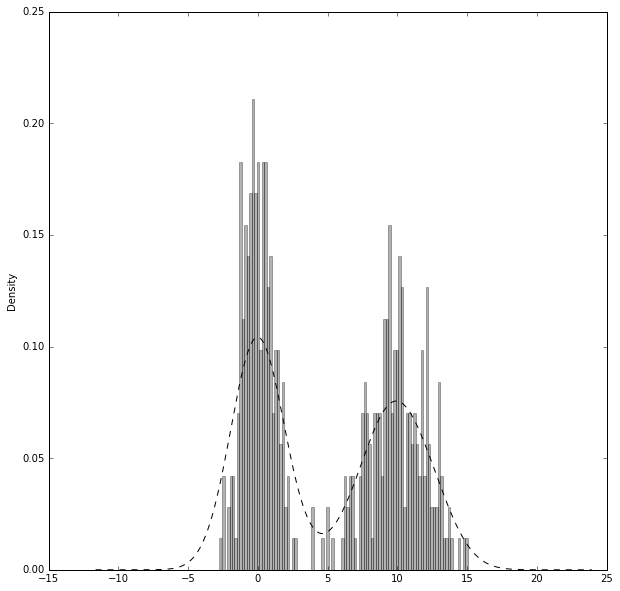

In [43]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter plots

In [46]:
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [47]:
plt.figure()

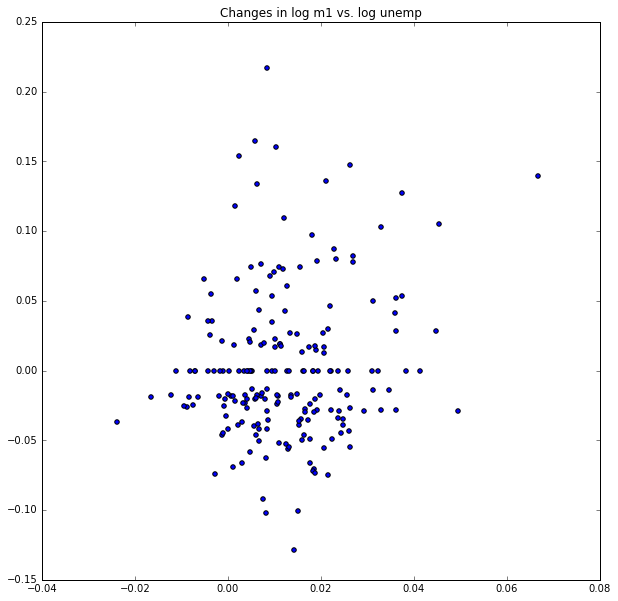

In [48]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d9c350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113058f10>]], dtype=object)

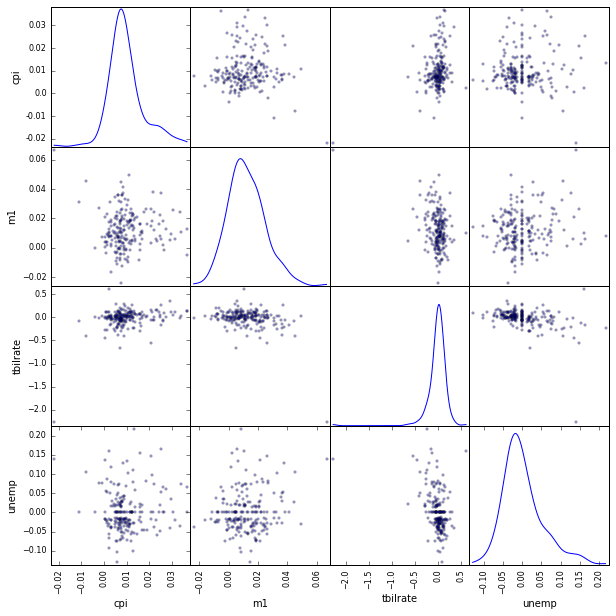

In [49]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)